# **Proyek Analisis Data: Bike Sharing Dataset**
- **Nama:** Ihsan Fikri A M
- **Email:** Ihsanfikri2@gmail.com
- **ID Dicoding:** ihsanfikri

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda di Washington D.C. selama periode 2011-2012?

2. Apakah terdapat pola tertentu dalam penggunaan sepeda berdasarkan hari dalam seminggu dan status hari (hari kerja, akhir pekan, atau libur)?

# **Informasi terkait Datasets**
instant: record index

dteday : date

season : season (1:springer, 2:summer, 3:fall, 4:winter)

yr : year (0: 2011, 1:2012)

mnth : month ( 1 to 12)

hr : hour (0 to 23)

holiday : weather day is holiday or not (extracted from [Web Link])

weekday : day of the week

workingday : if day is neither weekend nor holiday is 1, otherwise is 0.

weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)

atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)

hum: Normalized humidity. The values are divided to 100 (max)

windspeed: Normalized wind speed. The values are divided to 67 (max)

casual: count of casual users

registered: count of registered users

cnt: count of total rental bikes including both casual and registered
for further more information please go through the following link,

http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

# Import Semua Packages/Library yang Digunakan


In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import matplotlib.image as mpimg
from scipy import stats
import seaborn as sns

## 1 Data Wrangling


### Gathering Data

In [2]:
# Directory containing the CSV files
data_dir = "/content/drive/MyDrive/"

# opening datasets
hour_df = pd.read_csv(data_dir + 'hour.csv')



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Assessing Data

In [6]:
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [7]:
hour_df.duplicated().sum()

0

insight:
- Dataset berisi 17379 baris data dan 17 kolom
- Dataset tidak memiliki nilai null
- Dataset tidak memiliki duplikasi data
- Ditemukan data dteday berjenis string

### Cleaning Data

In [8]:
# Mengubah tipe data ke catagorical
hour_df['season'] = hour_df.season.astype('category')
hour_df['yr'] = hour_df.yr.astype('category')
hour_df['mnth'] = hour_df.mnth.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weathersit'] = hour_df.weathersit.astype('category')

# Mengubah kolom 'dteday' dari string ke datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])


In [9]:
# Merubah data angka menjadi keterangan
hour_df['mnth'] = hour_df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
hour_df['season'] = hour_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
hour_df['weathersit'] = hour_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

hour_df['yr'] = hour_df['yr'].map({
    0: '2011', 1: '2012'
})

hour_df['workingday'] = hour_df['workingday'].map({
    0: 'Holiday', 1: 'Workingday'
})

In [10]:
# Mengganti nama column agar mudah dimengerti
hour_df.rename(columns={'instant':'rec_id',
                   'dteday':'datetime',
                   'holiday':'is_holiday',
                   'workingday':'is_workingday',
                   'weathersit':'weather_condition',
                   'hum':'humidity',
                   'mnth':'month',
                   'cnt':'total_count',
                   'hr':'hour',
                   'yr':'year'},inplace=True)

In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rec_id             17379 non-null  int64         
 1   datetime           17379 non-null  datetime64[ns]
 2   season             17379 non-null  category      
 3   year               17379 non-null  category      
 4   month              17379 non-null  category      
 5   hour               17379 non-null  int64         
 6   is_holiday         17379 non-null  category      
 7   weekday            17379 non-null  category      
 8   is_workingday      17379 non-null  category      
 9   weather_condition  17379 non-null  category      
 10  temp               17379 non-null  float64       
 11  atemp              17379 non-null  float64       
 12  humidity           17379 non-null  float64       
 13  windspeed          17379 non-null  float64       
 14  casual

In [12]:
hour_df.describe()

,rec_id,datetime,hour,temp,atemp,humidity,windspeed,casual,registered,total_count
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [13]:
hour_df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,Spring,2011,Jan,0,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Sat,Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Sat,Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


### Save Cleaned data (Optional)

In [14]:
hour_df.to_csv("/content/drive/MyDrive/cleaned_bikeshare_hours.csv", index=False)
data_cleaned_df = hour_df

## 2 *Exploratory Data Analysis*

In [15]:
data_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rec_id             17379 non-null  int64         
 1   datetime           17379 non-null  datetime64[ns]
 2   season             17379 non-null  category      
 3   year               17379 non-null  category      
 4   month              17379 non-null  category      
 5   hour               17379 non-null  int64         
 6   is_holiday         17379 non-null  category      
 7   weekday            17379 non-null  category      
 8   is_workingday      17379 non-null  category      
 9   weather_condition  17379 non-null  category      
 10  temp               17379 non-null  float64       
 11  atemp              17379 non-null  float64       
 12  humidity           17379 non-null  float64       
 13  windspeed          17379 non-null  float64       
 14  casual

In [16]:
data_cleaned_df.describe()

,rec_id,datetime,hour,temp,atemp,humidity,windspeed,casual,registered,total_count
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


### Tren Rental Sepeda per tahun

In [17]:
trend_bike = data_cleaned_df.groupby(by='year').agg({
    'total_count': 'mean'
})

trend_bike.head()

<ipython-input-17-23652c83afa6>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend_bike = data_cleaned_df.groupby(by='year').agg({


,total_count
year,
2011,143.794448
2012,234.666361


### Mengelompokkan rental sepedah (casual dan registered) berdasarkan season

In [18]:
trend_bike_bySeason = data_cleaned_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'total_count': ['mean','max','min']
})

trend_bike_bySeason.head()

<ipython-input-18-7503c6ff112b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend_bike_bySeason = data_cleaned_df.groupby(by='season').agg({


casual  registered total_count         
             mean        mean        mean  max min
season                                            
Spring  14.290901   96.823668  111.114569  801   1
Summer  46.160581  162.183488  208.344069  957   1
Fall    50.287144  185.729093  236.016237  977   1
Winter  30.666824  168.202032  198.868856  967   1


### Mengelompokkan rental sepedah (casual dan registered) berdasarkan keadaan Cuaca

In [19]:
trend_bike_byWeather = data_cleaned_df.groupby(by='weather_condition').agg({
    'total_count': ['mean','max','min']
})

trend_bike_byWeather.head()

<ipython-input-19-756a6e791abb>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend_bike_byWeather = data_cleaned_df.groupby(by='weather_condition').agg({


total_count         
                           mean  max min
weather_condition                       
Clear/Partly Cloudy  204.869272  977   1
Misty/Cloudy         175.165493  957   1
Light Snow/Rain      111.579281  891   1
Severe Weather        74.333333  164  23

### Perbandingan harian rental sepeda

In [20]:
daily_trend = data_cleaned_df.groupby(by='weekday').agg({
    'total_count': ['mean','max','min']
})

daily_trend.head()

<ipython-input-20-935daabb6836>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_trend = data_cleaned_df.groupby(by='weekday').agg({


total_count         
               mean  max min
weekday                     
Sun      177.468825  776   1
Mon      183.744655  968   1
Tue      191.238891  970   1
Wed      191.130505  977   1
Thu      196.436665  976   1

### Perbandingan rental sepedah berdasarkan hari libur dan hari kerja

In [21]:
rent_byHolyday = data_cleaned_df.groupby(by='is_workingday').agg({
    'total_count': ['mean','max','min']
})

rent_byHolyday.head()

<ipython-input-21-f93fbb3df092>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rent_byHolyday = data_cleaned_df.groupby(by='is_workingday').agg({


total_count         
                     mean  max min
is_workingday                     
Holiday        181.405332  783   1
Workingday     193.207754  977   1

## 3 Visualization & Explanatory Analysis

### a. Visualisasi Tren Rental Sepedah Per Tahun

<ipython-input-22-40a937a6c236>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = data_cleaned_df.groupby(by=["month","year"]).agg({


   month  year  total_count
0    Jan  2011        38189
1    Jan  2012        96744
2    Feb  2011        48215
3    Feb  2012       103137
4    Mar  2011        64045
5    Mar  2012       164875
6    Apr  2011        94870
7    Apr  2012       174224
8    May  2011       135821
9    May  2012       195865
10   Jun  2011       143512
11   Jun  2012       202830
12   Jul  2011       141341
13   Jul  2012       203607
14   Aug  2011       136691
15   Aug  2012       214503
16   Sep  2011       127418
17   Sep  2012       218573
18   Oct  2011       123511
19   Oct  2012       198841
20   Nov  2011       102167
21   Nov  2012       152664
22   Dec  2011        87323
23   Dec  2012       123713


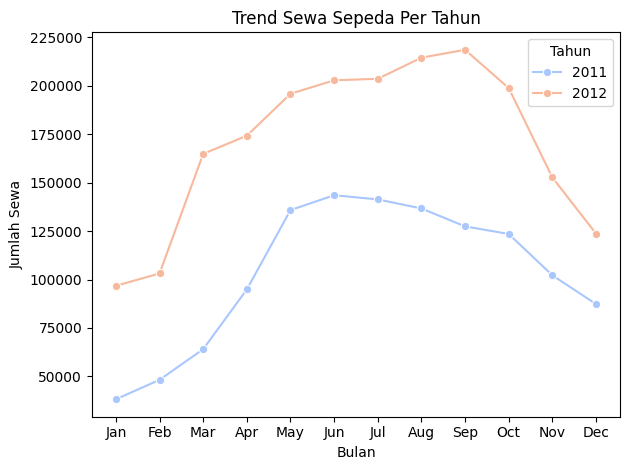

In [22]:
monthly_counts = data_cleaned_df.groupby(by=["month","year"]).agg({
    "total_count": "sum"
}).reset_index()
print(monthly_counts)

sns.lineplot(
    data=monthly_counts,
    x="month",
    y="total_count",
    hue="year",
    palette='coolwarm',
    marker="o")

plt.title("Trend Sewa Sepeda Per Tahun")
plt.xlabel('Bulan')
plt.ylabel('Jumlah Sewa')
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

### b. Visualisasi Mengelompokkan rental sepeda (casual dan registerd) berdasarkan season

<ipython-input-23-87fb1bff1395>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_pattern = data_cleaned_df.groupby('season')[['registered', 'casual']].sum().reset_index()


   season  registered  casual
0  Spring      410726   60622
1  Summer      715067  203522
2    Fall      835038  226091
3  Winter      711831  129782


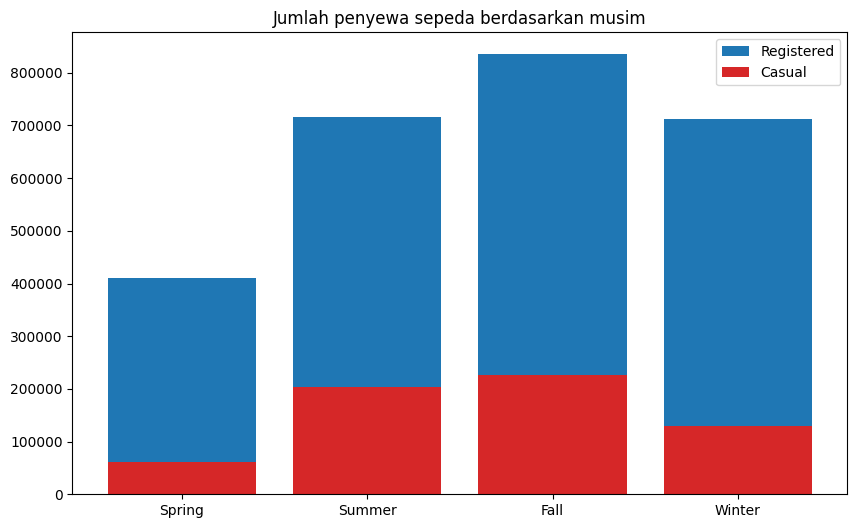

In [23]:
season_pattern = data_cleaned_df.groupby('season')[['registered', 'casual']].sum().reset_index()
print(season_pattern)
plt.figure(figsize=(10, 6))

plt.bar(
    season_pattern['season'],
    season_pattern['registered'],
    label='Registered',
    color='tab:blue'
)

plt.bar(
    season_pattern['season'],
    season_pattern['casual'],
    label='Casual',
    color='tab:red',
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah penyewa sepeda berdasarkan musim')
plt.legend()
plt.show()

### c. Visualisasi Mengelompokkan rental sepeda (casual dan registered) berdasarkan keadaan Cuaca

<ipython-input-24-abc82f337aa5>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rentals_per_weather = data_cleaned_df.groupby('weather_condition')['total_count'].mean()
<ipython-input-24-abc82f337aa5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rentals_per_weather.index, y=avg_rentals_per_weather.values, palette='viridis')


weather_condition
Clear/Partly Cloudy    204.869272
Misty/Cloudy           175.165493
Light Snow/Rain        111.579281
Severe Weather          74.333333
Name: total_count, dtype: float64


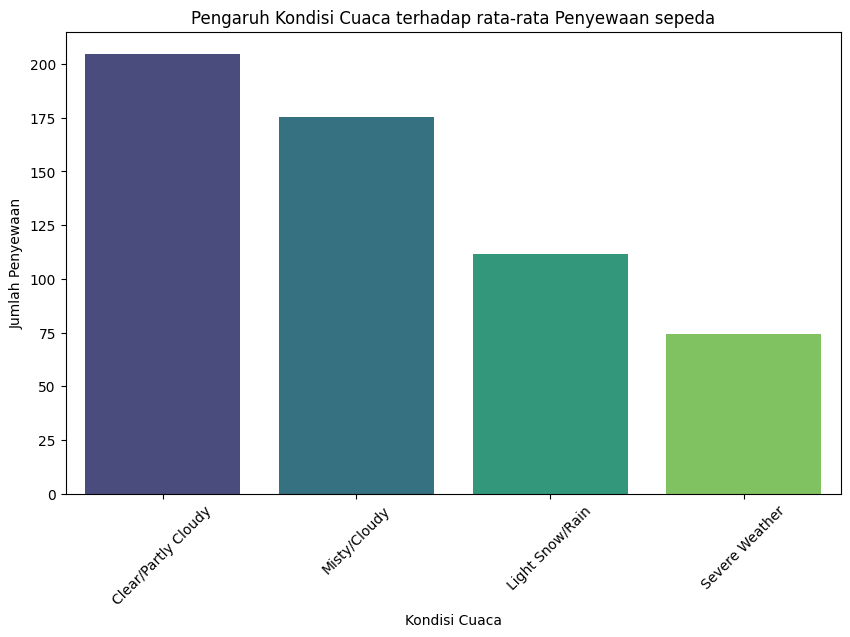

In [24]:
# Menghitung rata-rata total_count berdasarkan weather_condition
avg_rentals_per_weather = data_cleaned_df.groupby('weather_condition')['total_count'].mean()

# Menampilkan hasil
print(avg_rentals_per_weather)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rentals_per_weather.index, y=avg_rentals_per_weather.values, palette='viridis')
plt.title('Pengaruh Kondisi Cuaca terhadap rata-rata Penyewaan sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.show()

### d. Visualisasi Perbandingan harian rental sepeda

<ipython-input-25-3cf2d4340651>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


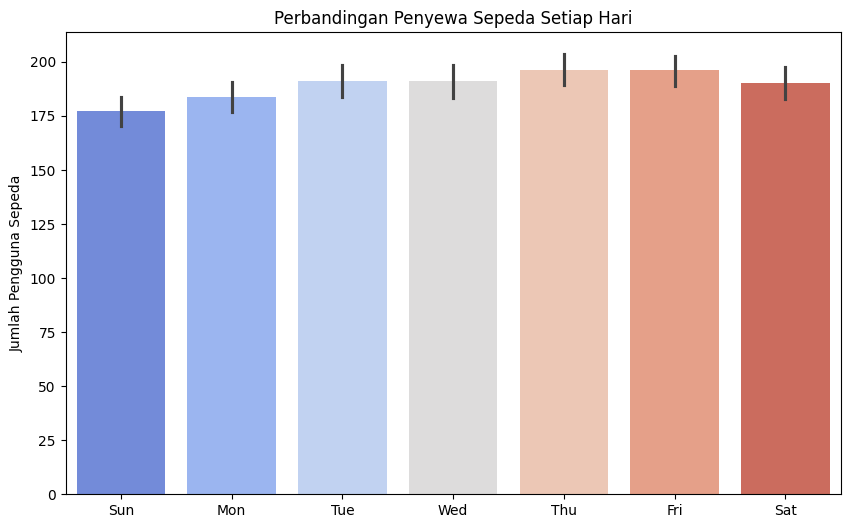

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weekday',
    y='total_count',
    data=data_cleaned_df,
    order=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
    ,palette='coolwarm')

plt.title('Perbandingan Penyewa Sepeda Setiap Hari')
plt.xlabel(None)
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

### e. Visualisasi Perbandingan rental sepedah berdasarkan hari libur dan hari kerja

<ipython-input-26-6ba48fc317f3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


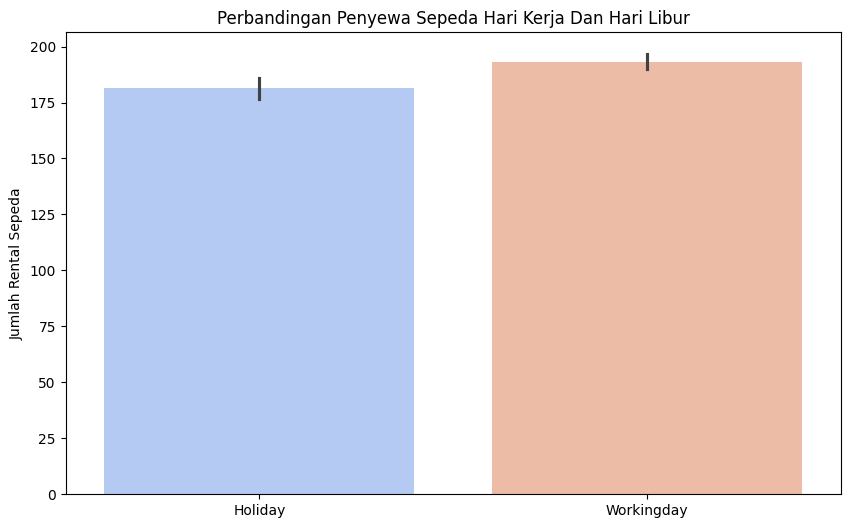

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='is_workingday',
    y='total_count',
    data=data_cleaned_df,
    palette='coolwarm')

plt.title('Perbandingan Penyewa Sepeda Hari Kerja Dan Hari Libur')
plt.xlabel(None)
plt.ylabel('Jumlah Rental Sepeda')
plt.show()

Insight:
- Penyewa sepedah lebih banyak pada hari kerja dibanding dengan hari libur

### f. Korelasi kondisi cuaca (seperti temperatur, kelembapan, dan kecepatan angin), casual dan registered terhadap jumlah Rental Sepeda

<Axes: >

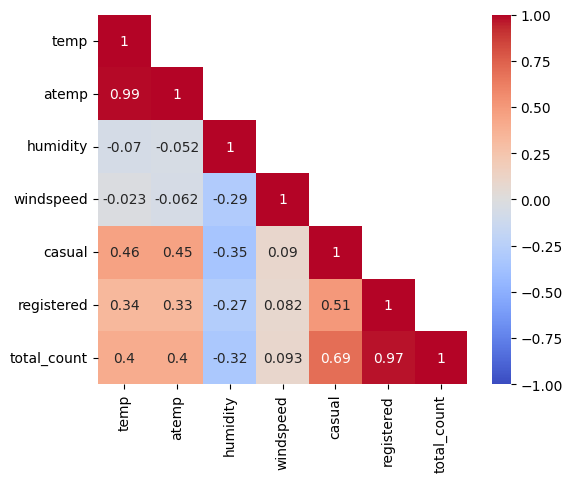

In [27]:
corrMatt = data_cleaned_df[["temp","atemp",
"humidity","windspeed",
"casual","registered",
"total_count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

sns.heatmap(corrMatt, annot=True, cmap='coolwarm', vmin=-1, vmax=1,square=True, mask=mask)


Insight:
 - terdapat 2 variabel yang memiliki tingkat korelasi tinggi dengan jumlah rental sepeda yaitu variabel casual dan registered

### g. Hubungan antara Jam sewa dengan total sepeda yang dirental pada hari kerja dan hari libur

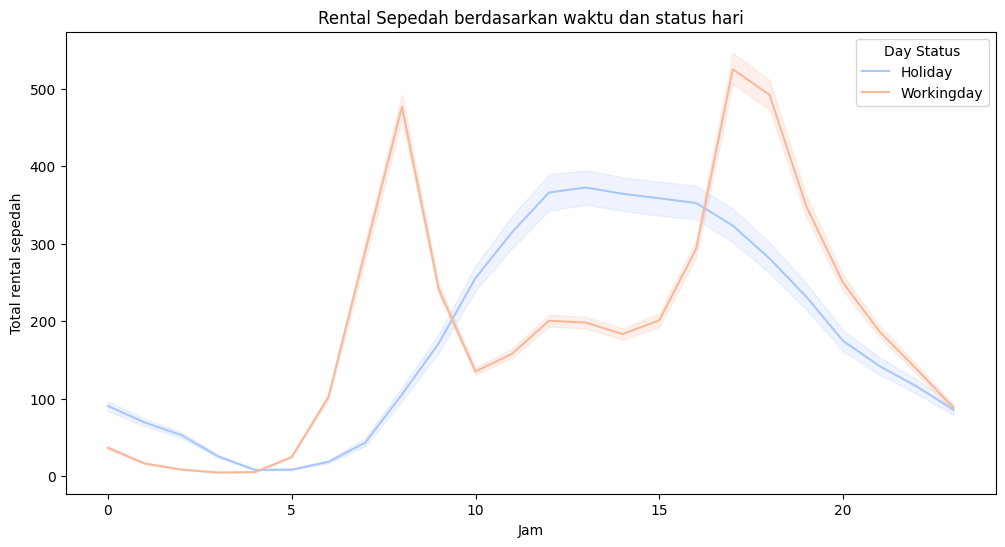

In [28]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_cleaned_df, x='hour', y='total_count', hue='is_workingday', palette='coolwarm')
plt.title('Rental Sepedah berdasarkan waktu dan status hari')
plt.xlabel('Jam')
plt.ylabel('Total rental sepedah')
plt.legend(title='Day Status')
plt.show()


Insight:
- pada hari libur, peminjaman sepeda meningkat antara pukul 10 - 15 dibandingkan dengan hari kerja
- antara pukul 5 dan 10 serta antara pukul 15 dan 20 terdapat lonjakan peminjam sepeda pada hari kerja

## Conclusion

Pertanyaan 1: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda di Washington D.C. selama periode 2011-2012?
- Berdasarkan data 3.c (Visualisasi Mengelompokkan rental sepeda (casual dan registered) berdasarkan keadaan cuaca) dapat disimpulkan bahwa :
 - Cuaca cerah (Clear/Partly Cloudy) berdampak positif terhadap jumlah penyewaan sepeda
 - Cuaca Ekstrim (Severe Weather) cukup berdampak buruk / negatif terhadap jumlah penyewaan sepdah

\

Pertanyaan 2: Apakah terdapat pola tertentu dalam penggunaan sepeda berdasarkan hari dalam seminggu dan status hari (hari kerja, akhir pekan, atau libur)?
- terdapat pola peminjamaan yang meningkat:
 - Pada hari kerja, yaitu di jam-jam berangkat kerja (antara pukul 05.00 - 10.00 ) dan jam pulang kerja (antara pukul 15.00 - 20.00)
 - Pada hari libur, yaitu pada sore sampai malam hari sekitar pukul 15.00 sampai dengan 20.00


In [29]:
pip freeze > requirements.txt